# Statistical Data Analysis Sprint: Cellphone Plan Data

- [The Goal](#goal)
- [Step 0](#imports): Imports
- [Step 1](#step1): Open the data file and study the general information
    - [Step 1 conclusion](#step1con)
- [Step 2](#step2): Prepare the data
    - [Step 2 conclusion](#step2con)
- [Step 3](#step3): Analyze the data
    - [Step 3 conclusion](#step2con)
- [Step 4](#step4): Test the hypotheses
    - [Hypothesis 1](#hypothesis1): The average revenue from users of Ultimate and Surf calling plans differs
    - [Hypothesis 2](#hypothesis2): The average revenue from users in NY-NJ area is different from that of the users from other regions
    - [Step 4 conclusion](#step2con)
- [Step 5](#step5): Write an overall conclusion

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
It’s great that you added a table of contents with links, but please add a goal of the project. 
</div>

## The Goal <a id='goal'></a>

The goal of this project is to explore the cell phone plan usage of a select group of users, determine the impacts of the information on the revenue of the two plans, and determine which plan ultimately generates more revenue.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 3:
    
Well done that you added a goal of the project. 
</div>

## Step 0: Imports
<a id='imports'></a>

In [1]:
#imports
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import math, re

## Step 1: Open the data file and study the general information
<a id='step1'></a>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please add a correct path to the file :) Please see instructions if necessary.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Great, now it's cottect :)
</div>

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

calls.info()
internet.info()
messages.info()
plans.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (tot

### Step 1 conclusion
<a id='step1con'><a/>

Initially, we can see that there are no unintentional null values in any of the sets. The only nulls are in the `user` dataset, for the variable `churn_date` which is meant to be the date of the user terminating their plan. In the sample of 500 users, only 34 terminated their plan within this timeframe of the sample.

The text `id` number in the `messages` dataset is the user_id plus a message tag. Initially, the message tag number seems inconsistent, but in some sections of a user's messages, the number appears to be consistently consecutive odd or even numbers, implying that the tags inbetween are just the messages received. Received messages are not accounted for in billing.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Ok, data is downloaded and ready for the further preparation and analysis.
</div>

## Step 2: Prepare the data
<a id='step2'></a>

First, all dates should be made into datetime objects. Secondly, the month of each item than includes a date should have the month placed into a separate column, so the month can beused to calculate the revenue, per month, per user.

In [3]:
calls.duration = calls.duration.apply(lambda x: math.ceil(x))
calls.call_date = pd.to_datetime(calls.call_date)
calls['month'] = calls.call_date.dt.month
print(calls.head())
calls.info()
calls.describe()['duration']

         id  user_id  call_date  duration  month
0   1000_93     1000 2018-12-27         9     12
1  1000_145     1000 2018-12-27        14     12
2  1000_247     1000 2018-12-27        15     12
3  1000_309     1000 2018-12-28         6     12
4  1000_380     1000 2018-12-30         5     12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null int64
month        137735 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.3+ MB


count    137735.000000
mean          7.146673
std           5.953919
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Yes, it's correct that you have used .ceil to round up data.
</div>

There appears to be zero duration call times. Presumably, these would be attempted calls that may have been missed, or cancelled. These would not count towards revenue. these can be removed.

In [4]:
calls = calls[calls['duration'] != 0]
print(calls.duration.min())

1


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Yes, a zero duration calls can be due to technical error or it can be a missed calls and calls with duration less than 1 minute.
</div>

In [5]:
internet.session_date = pd.to_datetime(internet.session_date)
internet['month'] = internet.session_date.dt.month
print(internet.head())
internet.info()
internet.describe().mb_used

         id  user_id session_date  mb_used  month
0   1000_13     1000   2018-12-29    89.86     12
1  1000_204     1000   2018-12-31     0.00     12
2  1000_379     1000   2018-12-28   660.40     12
3  1000_413     1000   2018-12-26   270.99     12
4  1000_442     1000   2018-12-27   880.22     12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
month           104825 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

Once again, there are values of zero during the mb_used. Lets find out how many.

In [6]:
print(internet[internet['mb_used'] == 0].id.count())

13747


This is not negligible, so we will fill them with the average internet usage by person. A possible account for this may be when the user is in wifi and therefore data is not actually being used.

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
Could you please explain a possible reasons of zero internet usage?
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 3:
    
Yes, a reasonable explanation. 
</div>

In [7]:
keys = internet.user_id.unique()
values = list(internet.groupby('user_id')['mb_used'].mean())
reference = {keys[i]: values[i] for i in range(len(keys))}

for i,val in internet.user_id.iteritems():
    if internet.loc[i,'mb_used'] == 0:
        internet.loc[i,'mb_used'] = reference[val]
internet.describe().mb_used

count    104825.000000
mean        411.056418
std         240.212411
min           0.010000
25%         249.963409
50%         355.085347
75%         554.710000
max        1693.470000
Name: mb_used, dtype: float64

In [8]:
messages.message_date = pd.to_datetime(messages.message_date)
messages['month'] = messages.message_date.dt.month
print(messages.head())
messages.info()

         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
month           76051 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


In [9]:
users.reg_date = pd.to_datetime(users.reg_date)
users.churn_date = pd.to_datetime(users.churn_date)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Well done that you brought the data to the desired formats.
</div>

for fast access, we will associate every `user_id` with their plan in a dictionary. 

In [10]:
user_plan = {}
for index, row in users.iterrows():
    user_plan[row['user_id']] = row['plan']

Next, each item that makes up the revenue from a user needs to be made into a pivot table to gather each user's activity each month.

In [11]:
call_by_month = pd.pivot_table(calls, values=['duration'], index=['user_id', 'month'], aggfunc={'user_id': 'count', 'duration': np.sum})
call_by_month.columns = ['total_call_duration','call_count']

In [12]:
messages_by_month = pd.pivot_table(messages, values=['id'], index=['user_id', 'month'], aggfunc='count')
messages_by_month.columns = ['message_count']

In [13]:
data_by_month = pd.pivot_table(internet, values=['mb_used'], index=['user_id', 'month'], aggfunc='sum')
data_by_month['Gb_used'] = data_by_month.mb_used.apply(lambda x: (x // 1024) + (x % 1024 > 0))

Because the data used each month is rounded up to the nearest GB, we needed to integer divide by 1024, and if there was any remaining amount, it would add 1, due to a 1 from a boolean.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Well done for using lambda functions.
</div>

Now we can join the three and create columns that will be used for the reven generated each month for each user and the user's plan type.

In [14]:
monthly_info = call_by_month
monthly_info = monthly_info.join(messages_by_month, how='outer')
monthly_info = monthly_info.join(data_by_month, how='outer')
monthly_info['revenue'] = 0.0
monthly_info['plan_type'] = 'surf'

To calculate the revenue per month, it checks each element of the revenue, and adds any extra amounts due to overusage of any category. This is added on the base amount for each plan that already covers a certain amount of call time, messages, and internet usage. 

Also, the plan gets updated to _ultimate_ when applicable for the user.

In [15]:
for index, row in monthly_info.iterrows():
    count = 0.0
    if user_plan[index[0]] == 'surf':
        count += 20
        if row.total_call_duration > 500:
            count += .03 * (row.total_call_duration - 500)
        if row.message_count > 50:
            count += .03 * (row.message_count - 50)
        if row.Gb_used > 15:
            count += 10 * (row.Gb_used - 15)
    else:
        monthly_info.loc[index, 'plan_type'] = 'ultimate'
        count += 70
        if row.total_call_duration > 3000:
            count += .01 * (row.total_call_duration - 3000)
        if row.message_count > 1000:
            count += .01 * (row.message_count - 1000)
        if row.Gb_used > 30:
            count += 7 * (row.Gb_used - 30)
    monthly_info.loc[index, 'revenue'] = count
monthly_info = monthly_info.reset_index()

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please analyse are there any anomalies in data?
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 3:
    
Great, anomalies with a zero duration calls and internet usage were described. 
</div>

### Step 2 conclusion <a id='step2con'></a>
In step 2, all dates were turned into datetime objects, and the months pulled into their own columns. Each call was rounded up towards the nearest minute, and the monthly mb of internet usage was rounded up to the nearest Gb. 

After the data was properly processed, the monthly average number of messages, total call time, and data usage was calculated from pivot tables and joined into a single dataframe. The new dataframe, `monthly_info`, was used to calculate the revenue of each month of each user. The index of this dataframe was reset, so that all information of the user and month were available in the columns to make graphing and manipulating easier in step 3.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Well done that you clearly analysed data.
</div>

## Step 3. Analyze the data <a id='step3'></a>

In [16]:
monthly_info_surf = monthly_info[monthly_info['plan_type'] == 'surf']
monthly_info_ultimate = monthly_info[monthly_info['plan_type'] == 'ultimate']

Now that we have split the data by plans, we can graph the revenue, and the parameters that make up the revenue, by the plan type.

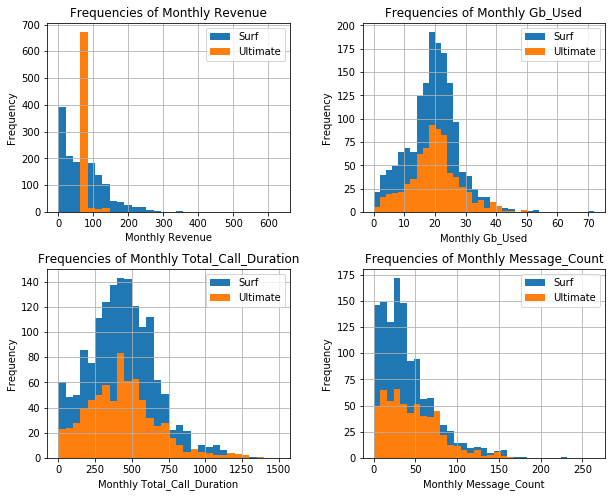

In [17]:
fig, axes = plt.subplots(2, 2)
parameters = [['revenue', 'Gb_used'], ['total_call_duration', 'message_count']]
for i in range(2):
    for ii in range(2):
        # make the bins line up between surf and ultimate
        max_surf_bin = math.ceil(monthly_info_surf[parameters[i][ii]].max())
        max_ultimate_bin = math.ceil(monthly_info_ultimate[parameters[i][ii]].max())
        max_val = max(max_surf_bin, max_ultimate_bin)
        bin_range = range(0, max_val, int(max_val/30))
        
        monthly_info_surf.hist(column=parameters[i][ii], bins = bin_range, ax=axes[i,ii], label='Surf')
        monthly_info_ultimate.hist(column=parameters[i][ii], bins = bin_range, ax=axes[i,ii], label='Ultimate')
        axes[i,ii].set_xlabel('Monthly {}'.format(parameters[i][ii].title()))
        axes[i,ii].set_ylabel('Frequency')
        axes[i,ii].set_title('Frequencies of Monthly {}'.format(parameters[i][ii].title()))
        axes[i,ii].legend(loc='upper right')
fig.set_size_inches(10,8)

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
It's great that you didn't forget the axis labels and the title to the graph. Well done that you plotted bothe plans on the same graph. This makes it easier to analyze the data.
</div>

The revenue of the plans has a significant difference between the two. It appears that the _surf_ plan users have a majority of people who only pay the $20, but still a significant number of users use more than the allotted amount of calls, messages, and data so they do pay more. As for the _ultimate_ plan users, most of them do not pay more than \\$70, and very few used their phone enough to increase their monthly bill.

As for the other variables, the two plans have extremely similar graph shapes compared between each other. The _ultimate_ plan looks like the _surf_ plan graphs, however they are scaled down. This implies that the difference is mostly in the number of users, and therefore a smaller user base would mean lower frequencies.

Lets look at the descriptive statistics to determine if this is true.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
It's great that you analyzed the graph in details. But could you please describe the type of distributions?
    
Please see for details: https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/
</div>

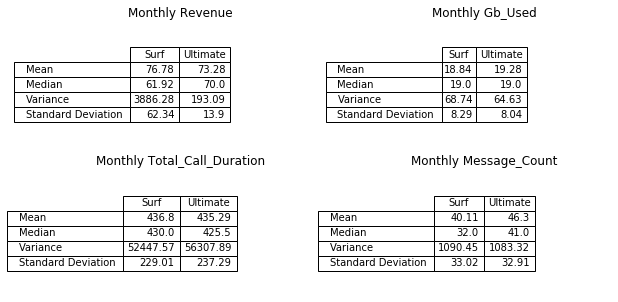

In [18]:
fig, axes = plt.subplots(2, 2)
collabel=("Surf", "Ultimate")
rowlabel=("Mean", "Median", "Variance", "Standard Deviation")
for i in range(2):
    for ii in range(2):
        par = parameters[i][ii]
        surf_info = monthly_info_surf[par]
        ultimate_info = monthly_info_ultimate[par]
        data = [
            [surf_info.mean(), ultimate_info.mean()],
            [surf_info.median(), ultimate_info.median()],
            [np.var(surf_info), np.var(ultimate_info)],
            [np.std(surf_info), np.std(ultimate_info)]
        ]
        for j in range(len(data)):
            for jj in range(len(data[0])):
                data[j][jj] = round(data[j][jj], 2)

        tab = axes[i,ii].table(cellText=data, colLabels=collabel, rowLabels=rowlabel, loc='center')
        axes[i,ii].set_title('Monthly {}'.format(parameters[i][ii].title()))
        axes[i,ii].get_xaxis().set_visible(False)
        axes[i,ii].get_yaxis().set_visible(False)
        axes[i,ii].axis('off')
        tab.auto_set_column_width(col=list(range(len(collabel))))
fig.set_size_inches(10,5)


As predicted in the graphs, the variances of all graphs besides the revenue are relatively similar between the two plans. Also, the mean and medians of these parameters are also very similar between each other. This indicates that most of the users have similar activity, regardless of the purchased plan.

Lets try this a second time, with outliers removed.

In [19]:
def clean_outliers(df, params):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

In [20]:
filter_parameters = ['Gb_used', 'total_call_duration', 'message_count']
monthly_info_surf_clean = clean_outliers(monthly_info_surf, parameters)
monthly_info_ultimate_clean = clean_outliers(monthly_info_ultimate, parameters)

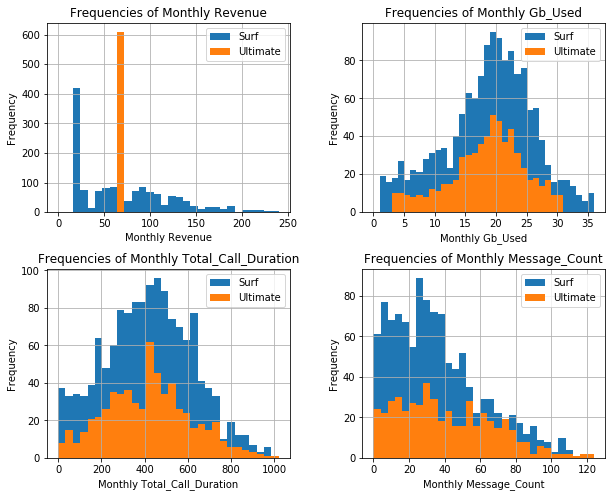

In [21]:
fig, axes = plt.subplots(2, 2)
parameters = [['revenue', 'Gb_used'], ['total_call_duration', 'message_count']]
for i in range(2):
    for ii in range(2):
        # make the bins line up between surf and ultimate
        max_surf_bin = math.ceil(monthly_info_surf_clean[parameters[i][ii]].max())
        max_ultimate_bin = math.ceil(monthly_info_ultimate_clean[parameters[i][ii]].max())
        max_val = max(max_surf_bin, max_ultimate_bin)
        bin_range = range(0, max_val, int(max_val/30))
        
        monthly_info_surf_clean.hist(column=parameters[i][ii], bins = bin_range, ax=axes[i,ii], label='Surf')
        monthly_info_ultimate_clean.hist(column=parameters[i][ii], bins = bin_range, ax=axes[i,ii], label='Ultimate')
        axes[i,ii].set_xlabel('Monthly {}'.format(parameters[i][ii].title()))
        axes[i,ii].set_ylabel('Frequency')
        axes[i,ii].set_title('Frequencies of Monthly {}'.format(parameters[i][ii].title()))
        axes[i,ii].legend(loc='upper right')
fig.set_size_inches(10,8)

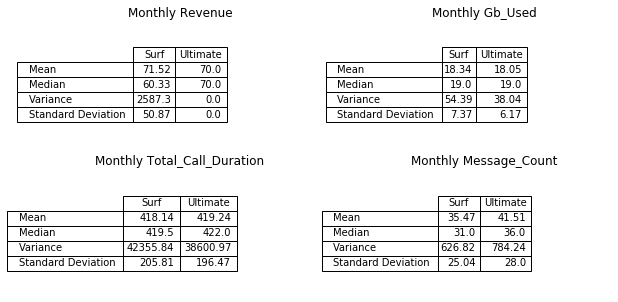

In [22]:
fig, axes = plt.subplots(2, 2)
collabel=("Surf", "Ultimate")
rowlabel=("Mean", "Median", "Variance", "Standard Deviation")
for i in range(2):
    for ii in range(2):
        par = parameters[i][ii]
        surf_info = monthly_info_surf_clean[par]
        ultimate_info = monthly_info_ultimate_clean[par]
        data = [
            [surf_info.mean(), ultimate_info.mean()],
            [surf_info.median(), ultimate_info.median()],
            [np.var(surf_info), np.var(ultimate_info)],
            [np.std(surf_info), np.std(ultimate_info)]
        ]
        for j in range(len(data)):
            for jj in range(len(data[0])):
                data[j][jj] = round(data[j][jj], 2)

        tab = axes[i,ii].table(cellText=data, colLabels=collabel, rowLabels=rowlabel, loc='center')
        axes[i,ii].set_title('Monthly {}'.format(parameters[i][ii].title()))
        axes[i,ii].get_xaxis().set_visible(False)
        axes[i,ii].get_yaxis().set_visible(False)
        axes[i,ii].axis('off')
        tab.auto_set_column_width(col=list(range(len(collabel))))
fig.set_size_inches(10,5)

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Well done that you calculated the mean, variance and standard deviation for both plans, analysed it and made a corresponding conclusions.
</div>

### Step 3 conclusion <a id='step3con'></a>
The early exploratory analysis has been completed, and the revenue and variables of the revenue have been explored. The revenue for both plans are positively skewed, but are shifted from each other based on the base price. The number of sent messages, internet used, and call durations are relatively similar in terms of their mean, median and standard deviation. This would indicate that a lot of _ultimate_ customers would most likely save money if they dropped to the _surf_ plan, and just paid for the extra usage above what is covered in the base cost. The costs are relatively the same, with and without the outliers gone. The _ultimate_ plan dropped slightly with the removal of the outliers, but because it removed any revenue instances above the base \\$70. The mean of the surf is 71 and the median is 60. So a majority already accept that they may use about the same as what is available to them in the base cost of the _ultimate_ plan, but can still normally stay below the \\$70 price tag of the _ultimate_ plan.

To further understand the difference and find if it is substantial, we will test difference in a hypothesis in step 4.

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 2:
    
Could you please analyse data for an outliers and remove them?
    
Please see for details: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba 
</div>

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 3:
    
Well done that you used IQR method to analyse and remove an outliers, but please remember about boxplots.
</div>

## Step 4. Test the hypotheses <a id='step4'></a>

In [23]:
# the level of significance
alpha = .05

### Hypothesis 1: The average revenue from users of Ultimate and Surf calling plans differs <a id='hypothesis1'></a>

A dual sample t-test will be used to determine if the _surf_ plan and _ultimate_ plan generate different monthly revenues per person. We will create the following hypotheses:

The null hypothesis, $H_0$: The average revenue from users of the _ultimate_ plan and the _surf_ plan are equal.  
The alternative hypothesis, $H_A$: The average revenue from users of the _ultimate_ plan and the _surf_ plan are not equal.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please add hypotheses formulation before the tests?
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Yes, a correct hypotheses formulation :)
</div>

In [24]:
results = st.ttest_ind(
    monthly_info_surf['revenue'],
    monthly_info_ultimate['revenue'],
    equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue > alpha:
    print('We cannot reject the null hypothesis')
else:
    print('We can reject the null hypothesis')

p-value:  0.03424497340667482
We can reject the null hypothesis


In [25]:
results = st.ttest_ind(
    monthly_info_surf_clean['revenue'],
    monthly_info_ultimate_clean['revenue'],
    equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue > alpha:
    print('We cannot reject the null hypothesis')
else:
    print('We can reject the null hypothesis')

p-value:  0.2582897479369501
We cannot reject the null hypothesis


The variances of the two subsamples are not equal, and therefore the parameter, `equal_var` must be set to False to compare sets with different variances and/or sets of different sizes.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please check options of the statistical tests? Please note that it's necessary to check that the populations have identical variances.
    
Please see for details: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
</div>

The null hypothesis of a dual sample t-test is that the two groups are similar, and the alternative hypothesis is that they are dissimilar. In this case, the null hypothesis is that the _surf_ plan generates similar monthly revenues per person to the _ultimate_ plan. In the results of the t-test with the outliers included, the p-value was below our level of significance and we could reject the null variable and say that the monthly revenue generated per person is different between the two plans. However, with the outliers removed, they appear to be too close to call. This makes sense from the mean and median shown above in Step 4. The _ultimate_ plan is generating a minimum of \\$70, while the mean and median of the _surf_ plan are about \\$71 and \\$70, respectively.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Yes, you right. We have a statistically significant differences in the average revenue from users of Ultimate and Surf plans.
</div>

### Hypothesis 2: The average revenue from users in NY-NJ area is different from that of the users from other regions <a id='hypothesis2'></a>

A single sample t-test will be used for the NY-NJ subset of users, as it is a sub-sample of the sample of 500 users of the plans. The following hypotheses were created:

The null hypothesis, $H_0$: The average revenue from users in the NY-NJ area are equal to the entire sample.  
The alternative hypothesis, $H_A$: The average revenue from users in the NY-NJ area are not equal to the entire sample.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Well done that you correctly formulated both hypothese.
</div>

In [26]:
monthly_info['in_NY_NJ'] = 0
for index, row in monthly_info.iterrows():
    user = row.user_id
    user_index = users.user_id[users.user_id == user].index
    if re.search('NY-NJ', users.iat[user_index[0], 4]):
        monthly_info.loc[index, 'in_NY_NJ'] = 1

A column indicating whether the user was located in the NY-NJ area was added to the `monthly_info` dataframe.

In [27]:
interested_value = int(monthly_info['revenue'].mean())
ny_nj_sample = monthly_info[monthly_info['in_NY_NJ'] == 1]
results = st.ttest_1samp(
    ny_nj_sample['revenue'],
    interested_value)

print('p-value: ', results.pvalue)

if results.pvalue > alpha:
    print('We cannot reject the null hypothesis')
else:
    print('We can reject the null hypothesis')

p-value:  0.9500937994379403
We cannot reject the null hypothesis


The null hypothesis of the single sample t-test is that the sub-sample of the NY-NJ usersgenerate similar revenue to that of the whole sample of the users, and the alternative hypothesis was that they were dissimilar. The p value of the t-test was above our level of significance, and so it fell within our band to not reject the null hypothesis. This means that as it stands, we cannot reject that the NY-NJ group of users generates similar revenue to the entire user base of the sample.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please see additional materials: https://ocw.mit.edu/courses/mathematics/18-443-statistics-for-applications-fall-2006/lecture-notes/lecture13.pdf 
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Yes, there is no a statistically significant differences in the average revenue from users in NY-NJ area and users from other regions.
</div>

### Step 4 conclusion <a id='step4con'></a>
The original hypotheses that we had were that the two cell plans generate different amounts of average monthly revenue of its users, and that the NY-NJ based users had differing amounts of revenue generation.

We can conclude, that for the first hypothesis, the two plans did generate different amounts of revenue with all events included, based on the rejection of the null hypothesis that they would be similar, but were not similar with outliers removed. This makes sense from our preliminary analysis of the measures of central tendancies and descriptive statistics. Because the _surf_ plan costs \\$20 at its lowest, and the _ultimate_ plan costs \\$70 at its base, it would make sense to suggest such a hypothesis if we would think people would buy the _surf_ plan because they thought they wouldn't use their phones enough to break a \\$70 price tag, but may end up paying about that much regardless.

As for the second hypothesis, we concluded that the NY-NJ based users do not generate more average monthly revenue than the average monthly of the entire sample. This implies that these users do not necessarily differ in overall phone usage than the other users. The city that never sleeps doesn't seem to spend that extra time looking at their phone as compared to the average Megaline user.

## Step 5. Write an overall conclusion <a id='step5'></a>

In this project, the data has been reviewed and changed into the correct types. The data has been split by year, so that the revenue can be calculated. Once done so, frequncy histograms and distributions by platform, genre, and ESRB rating were generated by location,. 

We initially found that phone usage did not seem to vary between the users of the two plans. The internet usage and total call time during the month was nearly identical between the plans. The messages averaged slightly higher with the _ultimate_ plan, but not considerably so, especially when they averaged around 46 sent messages per month, while the limit from the _surf_ plan to the _ultimate_ plan is from 50 to 1000 messages. The revenue appeared to be different from these histograms, so we continued further by hypothesizing that they were indeed different.

We used the alternative hypothesis that these two sets of users were indeed different, based on a 5% significance level with all months included, but were not different with the outliers removed. By comparing these two plans with the null hypothesis, that they were the same, we concluded that it failed the null hypothesis, so it was rejected and then the outliers were removed and the two were too close to reject the null hypothesis. We then questioned if location could be a factor in phone usage. In particular, the New York, New Jersey area, closer to the city that never sleeps. Surely they must need to use their phone more so, right? 

The hypothesis of this subsect of the sample was a single sample t test, tested against the entire set. The null hypothesis, being that they were indistinguishable from the entire set, could not be rejected, as the p value of the set fell was higher than our level of significance. We concluded, for now, that the NY-NJ group does not use their phones more than the average user of the entire sample.

We believe that any marketing should not be location based. Also, more effort should be put towards marketing the _surf_ plan because the average phone usage is indistinguishable between the plans and although marginal, the _surf_ plan generated more revenue per person, per month. This is the clase with and with outliers included.

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
It's great that you clearly described all main results of the project. But please note that for the operator, the Surf plan will be more profitable, while maintaining the current limits on the subscription fee.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 3:
    
Well done that you aclearly described all main results of the project. 
</div>